In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install numpy==1.16.1

Mounted at /content/drive
     |████████████████████████████████| 17.3MB 1.5MB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [1]:
import sys, os
sys.path.append('/content/drive/My Drive/cloud_content/research/VocEx/winter2020/embedding_analysis')
from emb_classifier_utils import *
from classification_pipeline import ClassificationPipeline
#import analysis_helpers as ah
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Load Embeddings, Metadata, & Original Pitch Tracks and Prepare Labels

In [3]:
embeddings = 'VocalSet_testList.txt_bs1_contours.npz'
rootdir = '/content/drive/My Drive/cloud_content/research/VocEx/winter2020/embedding_analysis'

E, F, SF, C= EmbeddingLoader().Load(os.path.join(rootdir,f'getEmbeddings/embeddings/{embeddings}'))
#B = [np.concatenate((E[i],C[i])) for i,x in enumerate(E)]

def test(L):
    print(L[0])
test(F); test(SF); #test(E); #test(C);
plt.plot(C[0])

KeyError: ignored

In [ ]:
Emotion, Intensity, Statement, Actor, Gender = RAVDESSLabels().Create(F)
#Followers, Followees, Country, Song = CreateDAMPLabels(F,'unq_metadata.txt')
#Artist = CreateArtistLabels(F)
print(Emotion)

5702 labels generated
['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'angry', 'angry', 'angry', 'angry', 'angry', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'fearful', 'fearful', 'fearful', 'fearful', 'calm', 'calm', 'calm', 'calm', 'calm', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'angry', 'angry', 'angry', 'angry', 'angry', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'fearful', 'fearful', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'angry', 'angry', 'angry', 'angry', 'angry', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',

In [ ]:
def printDistributions(category):
    print(Counter(category))
def printLabelDists(dataset):
    if(dataset=='RAVDESS'):
        printDistributions(Emotion)
        printDistributions(Intensity)
        printDistributions(Statement)
        printDistributions(Actor)
        printDistributions(Gender)

printLabelDists('RAVDESS')

Counter({'calm': 1227, 'sad': 1072, 'happy': 1069, 'fearful': 996, 'angry': 864, 'neutral': 474})
Counter({1: 3193, 2: 2509})
Counter({2: 2899, 1: 2803})
Counter({21: 344, 10: 338, 3: 306, 11: 289, 16: 280, 2: 270, 6: 270, 22: 266, 1: 253, 7: 246, 13: 243, 5: 236, 15: 231, 24: 231, 17: 229, 9: 227, 23: 227, 19: 226, 14: 222, 20: 208, 8: 203, 12: 181, 4: 176})
Counter({1: 3057, 0: 2645})


### Classifier Construction

In [ ]:
class LogisticRegressionClass(ClassificationPipeline):
    def __init__(self):
        super().__init__()
        self.model = LogisticRegression(class_weight = 'balanced', max_iter=5000)
        self.cmap = 'Blues'
lgrp = LogisticRegressionClass()
        
class MLPClass(ClassificationPipeline):
    def __init__(self, h1 = 32, h2 = 16, h3 = 16):
        super().__init__()
        self.model = MLPClassifier(hidden_layer_sizes=(h1, h2, h3), max_iter=1000)   
        self.cmap = 'YlOrBr'
mlp = MLPClass()

### Do Classification

(0.2807820163906699,
 0.22995139298353978,
 array([[0.06005234, 0.22723284, 0.49190763, 0.13480115, 0.        ,
         0.08600604],
        [0.01148223, 0.6417148 , 0.15134437, 0.10821812, 0.        ,
         0.08724049],
        [0.06213474, 0.20827572, 0.45709678, 0.18361272, 0.        ,
         0.08888005],
        [0.03666254, 0.35371562, 0.34887593, 0.16819111, 0.        ,
         0.09255479],
        [0.00746319, 0.56184692, 0.1789124 , 0.17460067, 0.        ,
         0.07717682],
        [0.03681175, 0.47078866, 0.22294484, 0.14797825, 0.        ,
         0.1214765 ]]),
 array(['angry', 'calm', 'fearful', 'happy', 'neutral', 'sad'], dtype='<U7'))

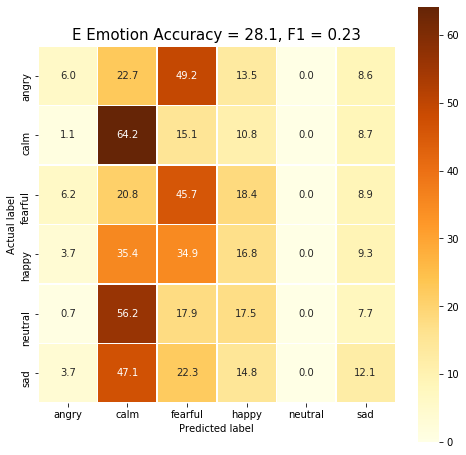

In [ ]:
# Emotion
MLPClass(64,32,8).classify(E,Emotion,'E Emotion')
#MLPClass(64,32,8).classify(C,Emotion,'C Emotion')
#lgrp.classify(E,Emotion,'E Emotion')
#lgrp.classify(C,Emotion,'C Emotion')

(0.5787439457539554,
 0.565928108058355,
 array([[0.7271473 , 0.2728527 ],
        [0.61031155, 0.38968845]]),
 array([1, 2]))

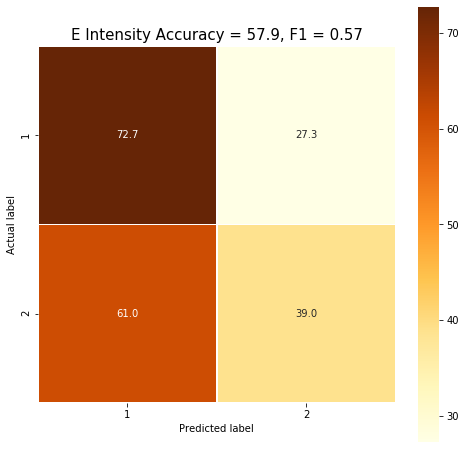

In [ ]:
## Intensity
MLPClass(64,32,16).classify(E,Intensity,'E Intensity')
#MLPClass(64,32,16).classify(C,Intensity,'C Intensity')
#lgrp.classify(E,Intensity,'E Intensity')
#lgrp.classify(C,Intensity,'C Intensity')

(0.5266577486661439,
 0.5229560690975292,
 array([[0.59968318, 0.40031682],
        [0.54468118, 0.45531882]]),
 array([1, 2]))

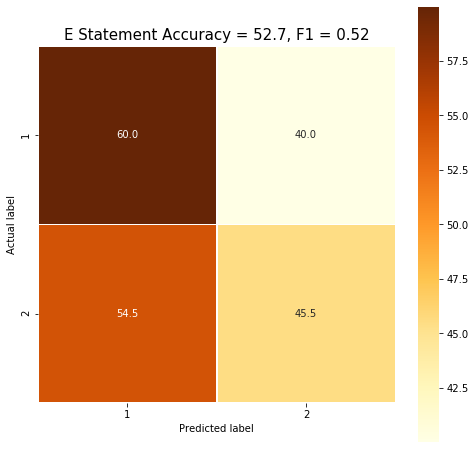

In [ ]:
##### Statement
MLPClass().classify(E,Statement,'E Statement')
#MLPClass().classify(C,Statement,'C Statement')
#lgrp.classify(E,Statement,'E Statement')
#lgrp.classify(C,Statement,'C Statement')

(0.3648177920685959,
 0.3548672905241323,
 array([[0.39386836, 0.24140618, 0.06294021, 0.0977606 , 0.20402465],
        [0.18112399, 0.46957264, 0.07743755, 0.14216181, 0.12970401],
        [0.23487805, 0.19693431, 0.21967403, 0.09883554, 0.24967807],
        [0.25256126, 0.30050758, 0.04539196, 0.2299951 , 0.1715441 ],
        [0.18657462, 0.13558468, 0.12240353, 0.09456875, 0.46086842]]),
 array([ 3, 10, 11, 16, 21]))

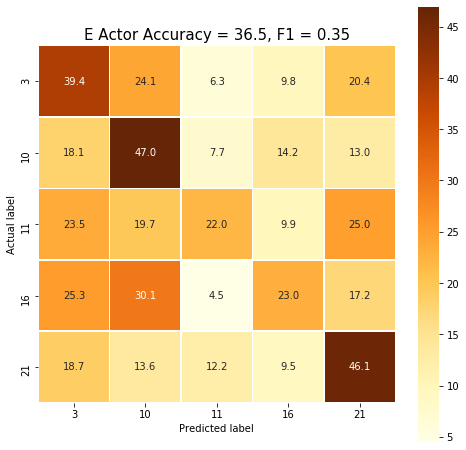

In [ ]:
# Actor

all_vt = [song[0] for song in Counter(Actor).most_common()]
top_vt = [all_vt[i] for i in range(5)]

def isVT(x):
    global top_vt
    if(x in top_vt): return 1
    else: return 0
indices = [i for i, x in enumerate(Actor) if isVT(x)]
Esub = [E[i] for i in indices]
Csub = [C[i] for i in indices]
Actorsub = [Actor[i] for i in indices]

MLPClass(128,128,32).classify(Esub,Actorsub,'E Actor')
#MLPClass(128,128,32).classify(Csub,Actorsub,'C Actor')
#lgrp.classify(Esub,Actorsub,'E Vocal Technique')
#lgrp.classify(Csub,Actorsub,'C Vocal Technique')


#MLPClass(128,128,64).classify(E,Actor,'E Actor')
#MLPClass(128,128,64).classify(C,Actor,'C Actor')
#lgrp.classify(E,Actor,'E Actor')
#lgrp.classify(C,Actor,'C Actor')

(0.5938261297415318,
 0.5754114821910049,
 array([[0.38276549, 0.61723451],
        [0.22323366, 0.77676634]]),
 array([0, 1]))

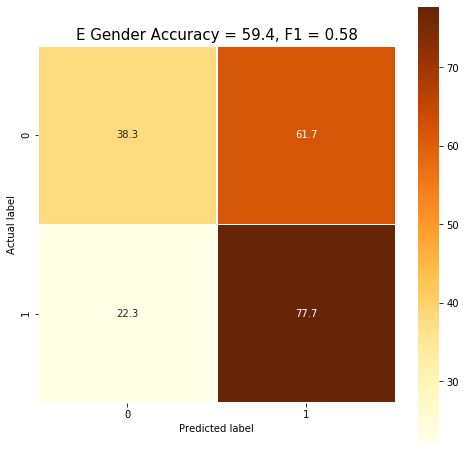

In [ ]:
# Gender
MLPClass(64,32,8).classify(E,Gender,'E Gender')
#MLPClass(64,32,8).classify(C,Gender,'C Gender')
#lgrp.classify(E,Gender,'E Gender')
#lgrp.classify(C,Gender,'C Gender')